<a href="https://colab.research.google.com/github/sjhwang031/DL23/blob/main/test2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **DLW10A-NLP01.ipynb**
##### reference data : https://realpython.com/nltk-nlp-python/

https://github.com/MK316/Spring2023/blob/main/DL/NLP01.ipynb

# 0. Preview : Worldcloud(NLP, NLTK)

NLP : Natural language processing (컴퓨터 프로그램에서 인간이 자연어를 사용할 수 있도록 하는 데 중점을 둔 분야)

NLTK : Natural language toolkit (NLP에 사용할 수 있는 Python 패키지)


Please paste your text here: example_string = "I live in Korea. I like Korea"


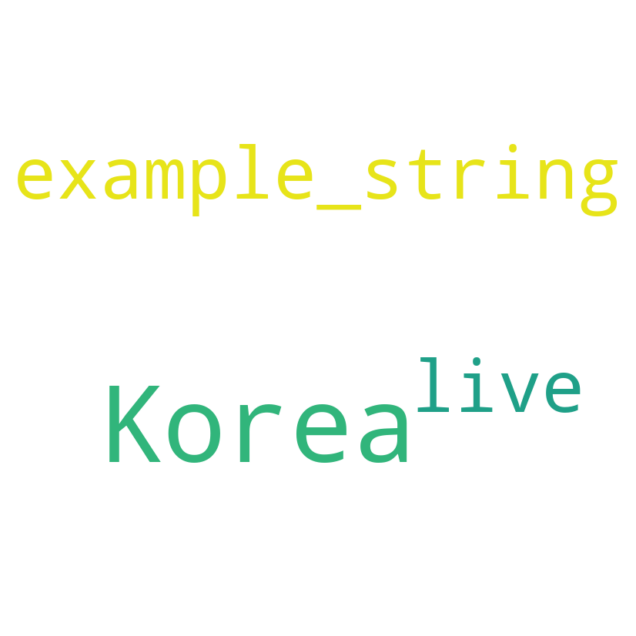

In [ ]:
#Worldcloud 만드는 coding

#@markdown Wordcloud with your own text: Paste your text

#Import libraries
#('matplotlib'과 'worldcloud' 가져오기)
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Getting text from the user
# (사용자로부터 텍스트 입력 받기 -> 사용자의 입력을 'user_text'라는 변수에 저장)
user_text = input("Please paste your text here: ")

#worldcloud 객체 생성하기
wordcloud = WordCloud(
    background_color='white',
    width=800,
    height=800,
    max_words=100
).generate(user_text)

#worldcloud 그림 크기를 지정하고 그림 생성

#'plt.figure(figsize=(8, 8))'로 그림 크기를 지정
#'plt.imshow()'를 통해서 worldcloud를 그림으로 표시
#'interpolation=bilinear'는 이미지를 부드럽게 표현하기 위한 보간 방법을 지정
#'plt.axis('off')'는 축을 제거하여 worldcloud에 대한 좌표축을 표시하지 않도록 한다.
plt.figure(figsize=(8, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
#Worldcloud 사진 저장하는 방법

#worldcloud이미지를 저장할 경로 지정
image_path = 'wordcloud.png'

#'plt.savefig()'라는 함수를 사용해서 현재 그림을 지정된 경로 (image_path)에 저장
plt.savefig(image_path)

#저장된 이미지의 경로를 출력
print(f"Word cloud image saved as {image_path}")


Word cloud image saved as wordcloud.png


<Figure size 640x480 with 0 Axes>

#1. Tokenize by words or sentences

##### - text를 (단어나 문장 단위 같이) 작은 단위로 나누는 것)
##### - Tokenize by word : 자주 나오는 단어 식별 가능
##### - Tokenize by sentence  :해당 단어가 서로 어떻게 관련되어 있는지 분석하고, 맥락 파악에 용

###split 함수 (문장을 단어 단위로 나누는 것)

In [ ]:
#split 함수
example_string = "My name is Sarah. I live in a big city. I like to read books and play with my cat."
set1 = example_string.split()
print(set1)

['My', 'name', 'is', 'Sarah.', 'I', 'live', 'in', 'a', 'big', 'city.', 'I', 'like', 'to', 'read', 'books', 'and', 'play', 'with', 'my', 'cat.']


In [ ]:
#"."을 기준으로 하는 split 함수
set2 = example_string.split(".")
set2
#'.' 뒤의 empty string도 포함시켜야 함
#empty string, list 공부

['My name is Sarah',
 ' I live in a big city',
 ' I like to read books and play with my cat',
 '']

###strip 함수(space(띄어쓰기 단위) 제거하는 것)

In [ ]:
set3 = [s.strip() for s in set2]
set3

['My name is Sarah',
 'I live in a big city',
 'I like to read books and play with my cat',
 '']

In [ ]:
# Remove empty string in a list
#!=는 부정문을 의미, ==는 긍정문을 의미

# if x의 값이 space가 아닐 때, x를 포함하는 새로운 list인 'set4'를 생성한다.
#x = 'set3' list의 요소들을 의미
#'if x != ""는 조건문으로, x가 빈 문자열이 아닌 경우에만 해당 조건을 만족
#[x for x in set3 if x != ""]는 리스트 컴프리헨션으로, 조건문을 만족하는 set3의 각 요소 x를 새로운 리스트 set4에 추가한다.

#Result : 'set4' list는 'set3'리스트에서 빈 문자열이 아닌 요소들로만 구성된다. 그래서 'set3'의 ''가 'set4'의 결과값에서 지워진 것임.

set4 = [x for x in set3 if x != ""]
set4

['My name is Sarah',
 'I live in a big city',
 'I like to read books and play with my cat']

In [ ]:
#'set4' list의 각 요소의 길이를 구하여 -> 'set5'라는 새로운 list를 생성
#t는 set4 리스트의 요소를 의미한다.
#for t in set4는 set4 리스트의 각 요소를 순회하면서 반복한다.
#len(t)는 t의 길이를 구하는 내장 함수로, t 요소의 길이를 반환한다.
#[len(t) for t in set4]는 리스트 컴프리헨션으로, set4의 각 요소 t의 길이를 새로운 리스트 set5에 추가다.
set5 = [len(t) for t in set4]
set5

[16, 20, 41]

##✏️Using {nltk} library

In [ ]:
example_string = "l love you. l am hungry. you're so stupid."

In [ ]:
from nltk.tokenize import sent_tokenize, word_tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
slist = sent_tokenize(example_string)
print(slist)

['l love you.', 'l am hungry.', "you're so stupid."]


### Tokenize by sentence - example coding

In [ ]:
#나의 text 입력
mytext=input("Paste text: ")

#text를 sentence로 나누기
slist1 = sent_tokenize(mytext)

#print하기
slist1

Paste text: A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them.  The bunch hung from a high branch, and the Fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain.  Now he sat down and looked at the grapes in disgust.  "What a fool I am," he said. "Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for."  And off he walked very, very scornfully.  There are many who pretend to despise and belittle that which is beyond their reach. ‹ backnext ›


['A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree.',
 "The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them.",
 'The bunch hung from a high branch, and the Fox had to jump for it.',
 'The first time he jumped he missed it by a long way.',
 'So he walked off a short distance and took a running leap at it, only to fall short once more.',
 'Again and again he tried, but in vain.',
 'Now he sat down and looked at the grapes in disgust.',
 '"What a fool I am," he said.',
 '"Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for."',
 'And off he walked very, very scornfully.',
 'There are many who pretend to despise and belittle that which is beyond their reach.',
 '‹ backnext ›']

In [ ]:
#sentence 개수 list
len(slist1)

12

In [ ]:
mywords = word_tokenize(mytext)

#단어 개수 보여주기
print(len(mywords))

#단어들중 0부터 10
mywords[:10]

180


['A', 'Fox', 'one', 'day', 'spied', 'a', 'beautiful', 'bunch', 'of', 'ripe']

#2. Flitering stopwords(의미 없는 단어들을 걸러내는 것)


In [ ]:
#'nltk' library에서 stopwords 데이터를 사용하기 위해 필요한 데이터를 다운로드 하기
nltk.download("stopwords")

#nltk.corpus 에서 stopwords 가져오기
from nltk.corpus import stopwords

#nltk.tokenize에서 word_tokenize 가져오기
from nltk.tokenize import word_tokenize

#sample 변수에 string 할당
sample = "Sir, I protest. I am not a merry man!"

#tokenized result
s1 = word_tokenize(sample); s1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['Sir', ',', 'I', 'protest', '.', 'I', 'am', 'not', 'a', 'merry', 'man', '!']

In [ ]:
stop_words = set(stopwords.words("english"))

In [ ]:
# string.casefold(): to all lower case so that we can compare strings
# string.casefold()는 string들끼리 비교 할 수 있도록 모두 소문자로 변경하는 것을 의미

w1 = "Mary"
w2 = "susan"
print(w1.casefold())
print(w2.casefold())

mary
susan


In [ ]:
# Remove punctuations and stopwords (구두점들과 의미 없는 단어들 걸러내는 것 )

# 걸러진 결과물이 저장될 장소
filtered_list = []

#s1에 있는 각 단아에 대해 반복
#if (word.casefold() not in stop_words) & (len(word) > 1): 조건문을 사용하여, 현재 단어가 stopwords list에 있는지 없는지 확인하기 위해서, word를 lower로 변경한 후에 확
#len(word) > 1 : 현재 단어의 길이가 1보다 큰지 확인하고, 길이가 1인 단어는 제외
#filtered_list.append(word) : 조건문이 true일 경우, 'flitered_list'에 현재 단어 추가

for word in s1:
   if (word.casefold() not in stop_words) & (len(word)>1):
        filtered_list.append(word)
#filtered_list에는 punctuations와 stopwords가 remove된 후, 길이가 1보다 큰 단어들이 저장됨.
filtered_list

['Sir', 'protest', 'merry', 'man']

Worldcloud with yout own text : Paste your text

In [ ]:
text1 = """
Once upon a time, there was a kind and adventurous boy named Jack. Jack loved exploring and going on exciting adventures. One day, Jack decided to go on a hike in the nearby forest. As he was walking, he heard a soft meowing sound.

Jack followed the sound and found a small, black kitten. The kitten was scared and alone. Jack picked up the kitten and carried her in his arms. He decided to take her home and give her a warm place to sleep and plenty of food to eat.

Jack named the kitten Luna, and she quickly became his best friend. They did everything together, playing in the park, exploring the woods, and snuggling up together to watch movies at night.

One day, Jack and Luna went on a hike and got lost. They wandered deeper and deeper into the woods, but they couldn't find their way back. Jack started to worry, but Luna stayed by his side, meowing softly to comfort him.

As they continued to wander, they stumbled upon a clearing where an old man was sitting by a campfire. The old man welcomed them and gave them food and water. Jack explained that they were lost, and the old man offered to help them find their way home.

The old man took them on a journey through the woods, showing them which paths to take and which to avoid. Finally, they arrived back at Jack's house, safe and sound.

From that day forward, Jack and Luna never went on another adventure without the old man's guidance. They were grateful to have each other and to have made a new friend who could help them when they needed it most.
"""

In [ ]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english'))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2]
w2

['upon',
 'time',
 'kind',
 'adventurous',
 'boy',
 'named',
 'Jack',
 'Jack',
 'loved',
 'exploring',
 'going',
 'exciting',
 'adventures',
 'One',
 'day',
 'Jack',
 'decided',
 'hike',
 'nearby',
 'forest',
 'walking',
 'heard',
 'soft',
 'meowing',
 'sound',
 'Jack',
 'followed',
 'sound',
 'found',
 'small',
 'black',
 'kitten',
 'kitten',
 'scared',
 'alone',
 'Jack',
 'picked',
 'kitten',
 'carried',
 'arms',
 'decided',
 'take',
 'home',
 'give',
 'warm',
 'place',
 'sleep',
 'plenty',
 'food',
 'eat',
 'Jack',
 'named',
 'kitten',
 'Luna',
 'quickly',
 'became',
 'best',
 'friend',
 'everything',
 'together',
 'playing',
 'park',
 'exploring',
 'woods',
 'snuggling',
 'together',
 'watch',
 'movies',
 'night',
 'One',
 'day',
 'Jack',
 'Luna',
 'went',
 'hike',
 'got',
 'lost',
 'wandered',
 'deeper',
 'deeper',
 'woods',
 'could',
 "n't",
 'find',
 'way',
 'back',
 'Jack',
 'started',
 'worry',
 'Luna',
 'stayed',
 'side',
 'meowing',
 'softly',
 'comfort',
 'continued',
 'wan

In [ ]:
#추가적인 stopwords를 기존 불용어 목록과 결합하는 과정 -> 텍스트 잔처리 과정에 사용되어 필터링에 도움을 줌
additional_stopwords = {'one', 'day', 'upon'}

# Create a new set of stopwords that includes the default stopwords and the additional ones
stop_words = set(stopwords.words('english') + list(additional_stopwords))

In [ ]:
w1 = word_tokenize(text1)
stop_words = set(stopwords.words('english') + list(additional_stopwords))

w2 = [w for w in w1 if w.lower() not in stop_words and len(w) > 2]
w2

['time',
 'kind',
 'adventurous',
 'boy',
 'named',
 'Jack',
 'Jack',
 'loved',
 'exploring',
 'going',
 'exciting',
 'adventures',
 'Jack',
 'decided',
 'hike',
 'nearby',
 'forest',
 'walking',
 'heard',
 'soft',
 'meowing',
 'sound',
 'Jack',
 'followed',
 'sound',
 'found',
 'small',
 'black',
 'kitten',
 'kitten',
 'scared',
 'alone',
 'Jack',
 'picked',
 'kitten',
 'carried',
 'arms',
 'decided',
 'take',
 'home',
 'give',
 'warm',
 'place',
 'sleep',
 'plenty',
 'food',
 'eat',
 'Jack',
 'named',
 'kitten',
 'Luna',
 'quickly',
 'became',
 'best',
 'friend',
 'everything',
 'together',
 'playing',
 'park',
 'exploring',
 'woods',
 'snuggling',
 'together',
 'watch',
 'movies',
 'night',
 'Jack',
 'Luna',
 'went',
 'hike',
 'got',
 'lost',
 'wandered',
 'deeper',
 'deeper',
 'woods',
 'could',
 "n't",
 'find',
 'way',
 'back',
 'Jack',
 'started',
 'worry',
 'Luna',
 'stayed',
 'side',
 'meowing',
 'softly',
 'comfort',
 'continued',
 'wander',
 'stumbled',
 'clearing',
 'old',
 

# Tagging Parts of Speech(NLP에서 주어진 문자의 각 단어에 해당하는 **품사** 정보를 할당하는 작업)

In [ ]:
from nltk.tokenize import word_tokenize

#'averaged_perceptron_tagger' 라는 데이터를 다운로드
nltk.download('averaged_perceptron_tagger')

#사용자로부터 입력 받기
sentence = input("Type your sentence: ")

#mywords에는 tokenized words들이 list형태로 저장됨
mywords = word_tokenize(sentence)

#품사 구별하기
nltk.pos_tag(mywords)

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Type your sentence: Don't say that


[('Do', 'VBP'), ("n't", 'RB'), ('say', 'VB'), ('that', 'IN')]

In [ ]:
#품사 태깅에 대한 설명을 확인하는 단계
nltk.download('tagsets')
# nltk.help.upenn_tagset()

[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Package tagsets is already up-to-date!


True

In [ ]:
nltk.download("book")

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/chat80.zip.
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package conll2000 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2000.zip.
[nltk_data]    | Downloading package conll2002 to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/conll2002.zip.
[nltk_data]    | Downloading package dependency_treebank to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/dependency_treebank.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    

True

In [ ]:
#nltk.book는 nltk 패키지의 일부
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [ ]:
#"man"이라는 단어가 나타나는 문맥을 보여줌(검색된 단어 주변에 있는 단어들과 함께, 해당 문장의 일부 출)
text8.concordance("man")

In [ ]:
#library 가져오기
import nltk

# 사용자로부터 텍스트 입력 받기
text = input("Paste your text: ")

# 단어들의 list로 tokenize
tokens = nltk.word_tokenize(text)

# Create an nltk.Text object from the list of tokens (tokens의 list를 통해서 nltk.Text 객체 생성)
text_object = nltk.Text(tokens)

# Use the concordance method to find occurrences of the word "fox" (주어진 단어가 나타나는 문장의 일부 출력)
text_object.concordance("fox")

Paste your text: A Fox one day spied a beautiful bunch of ripe grapes hanging from a vine trained along the branches of a tree. The grapes seemed ready to burst with juice, and the Fox's mouth watered as he gazed longingly at them.  The bunch hung from a high branch, and the Fox had to jump for it. The first time he jumped he missed it by a long way. So he walked off a short distance and took a running leap at it, only to fall short once more. Again and again he tried, but in vain.  Now he sat down and looked at the grapes in disgust.  "What a fool I am," he said. "Here I am wearing myself out to get a bunch of sour grapes that are not worth gaping for."  And off he walked very, very scornfully.  There are many who pretend to despise and belittle that which is beyond their reach. ‹ backnext ›
Displaying 3 of 3 matches:
A Fox one day spied a beautiful bunch of ri
d ready to burst with juice , and the Fox 's mouth watered as he gazed longingl
nch hung from a high branch , and the Fox had

#**DLW11A-NLP02.ipynb**

https://github.com/MK316/Spring2023/blob/main/DL/NLP02.ipynb

지난 시간에 배운 Import {nltk}와 wordcloud 코딩 예시

In [ ]:
#Import {nltk]} 코딩 예시
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Paste your text: A Lion lay asleep in the forest, his great head resting on his paws. A timid little Mouse came upon him unexpectedly, and in her fright and haste to get away, ran across the Lion's nose. Roused from his nap, the Lion laid his huge paw angrily on the tiny creature to kill her.  "Spare me!" begged the poor Mouse. "Please let me go and some day I will surely repay you."  The Lion was much amused to think that a Mouse could ever help him. But he was generous and finally let the Mouse go.  Some days later, while stalking his prey in the forest, the Lion was caught in the toils of a hunter's net. Unable to free himself, he filled the forest with his angry roaring. The Mouse knew the voice and quickly found the Lion struggling in the net. Running to one of the great ropes that bound him, she gnawed it until it parted, and soon the Lion was free.  "You laughed when I said I would repay you," said the Mouse. "Now you see that even a Mouse can help a Lion."


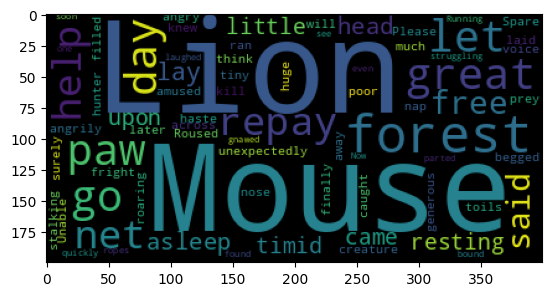

In [ ]:
#Worldcloud 코딩 예시

#무조건 사용자로서 text 입력하고 코딩하기
text = input("Paste your text: ")
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

wc = WordCloud().generate(text)
plt.imshow(wc)

# 3. Getting word frequency

In [ ]:
# word_tokenize: separating punctuation as individual word items(구두점을 포함한 전체 단어수와 그냥 전체 단어수)
words = word_tokenize(text)

# Without punctuation:
wordlist = []

for w in words:
  if len(w) > 2:
    wordlist.append(w)

print('Total words including punctuation: ', len(words))
print('Total words: ', len(wordlist))
print(wordlist)

Total words including punctuation:  222
Total words:  157
['Lion', 'lay', 'asleep', 'the', 'forest', 'his', 'great', 'head', 'resting', 'his', 'paws', 'timid', 'little', 'Mouse', 'came', 'upon', 'him', 'unexpectedly', 'and', 'her', 'fright', 'and', 'haste', 'get', 'away', 'ran', 'across', 'the', 'Lion', 'nose', 'Roused', 'from', 'his', 'nap', 'the', 'Lion', 'laid', 'his', 'huge', 'paw', 'angrily', 'the', 'tiny', 'creature', 'kill', 'her', 'Spare', 'begged', 'the', 'poor', 'Mouse', 'Please', 'let', 'and', 'some', 'day', 'will', 'surely', 'repay', 'you', 'The', 'Lion', 'was', 'much', 'amused', 'think', 'that', 'Mouse', 'could', 'ever', 'help', 'him', 'But', 'was', 'generous', 'and', 'finally', 'let', 'the', 'Mouse', 'Some', 'days', 'later', 'while', 'stalking', 'his', 'prey', 'the', 'forest', 'the', 'Lion', 'was', 'caught', 'the', 'toils', 'hunter', 'net', 'Unable', 'free', 'himself', 'filled', 'the', 'forest', 'with', 'his', 'angry', 'roaring', 'The', 'Mouse', 'knew', 'the', 'voice', 'a

In [ ]:
# Lower case (소문자로 만들기)
lowerword = []

for w in wordlist:
  w1 = w.lower()
  lowerword.append(w1)
print(lowerword)

words = lowerword
print("Word size before stopwords: ", len(words))

['lion', 'lay', 'asleep', 'the', 'forest', 'his', 'great', 'head', 'resting', 'his', 'paws', 'timid', 'little', 'mouse', 'came', 'upon', 'him', 'unexpectedly', 'and', 'her', 'fright', 'and', 'haste', 'get', 'away', 'ran', 'across', 'the', 'lion', 'nose', 'roused', 'from', 'his', 'nap', 'the', 'lion', 'laid', 'his', 'huge', 'paw', 'angrily', 'the', 'tiny', 'creature', 'kill', 'her', 'spare', 'begged', 'the', 'poor', 'mouse', 'please', 'let', 'and', 'some', 'day', 'will', 'surely', 'repay', 'you', 'the', 'lion', 'was', 'much', 'amused', 'think', 'that', 'mouse', 'could', 'ever', 'help', 'him', 'but', 'was', 'generous', 'and', 'finally', 'let', 'the', 'mouse', 'some', 'days', 'later', 'while', 'stalking', 'his', 'prey', 'the', 'forest', 'the', 'lion', 'was', 'caught', 'the', 'toils', 'hunter', 'net', 'unable', 'free', 'himself', 'filled', 'the', 'forest', 'with', 'his', 'angry', 'roaring', 'the', 'mouse', 'knew', 'the', 'voice', 'and', 'quickly', 'found', 'the', 'lion', 'struggling', 'the

In [ ]:
 #Stopwords to remove (의미 없는 단어 지우기)

from nltk.corpus import stopwords
nltk.download('stopwords')
print("Word size before stopwords: ", len(words))
print(words)

print("="*50)
words2 = [w for w in words if w not in stopwords.words('english')]
print(words2)
print("Word size after removing stopwords: ", len(words2))

Word size before stopwords:  157
['lion', 'lay', 'asleep', 'the', 'forest', 'his', 'great', 'head', 'resting', 'his', 'paws', 'timid', 'little', 'mouse', 'came', 'upon', 'him', 'unexpectedly', 'and', 'her', 'fright', 'and', 'haste', 'get', 'away', 'ran', 'across', 'the', 'lion', 'nose', 'roused', 'from', 'his', 'nap', 'the', 'lion', 'laid', 'his', 'huge', 'paw', 'angrily', 'the', 'tiny', 'creature', 'kill', 'her', 'spare', 'begged', 'the', 'poor', 'mouse', 'please', 'let', 'and', 'some', 'day', 'will', 'surely', 'repay', 'you', 'the', 'lion', 'was', 'much', 'amused', 'think', 'that', 'mouse', 'could', 'ever', 'help', 'him', 'but', 'was', 'generous', 'and', 'finally', 'let', 'the', 'mouse', 'some', 'days', 'later', 'while', 'stalking', 'his', 'prey', 'the', 'forest', 'the', 'lion', 'was', 'caught', 'the', 'toils', 'hunter', 'net', 'unable', 'free', 'himself', 'filled', 'the', 'forest', 'with', 'his', 'angry', 'roaring', 'the', 'mouse', 'knew', 'the', 'voice', 'and', 'quickly', 'found', 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## nltk.FreqDist(wordlist)(단어 종류랑 빈도수)

In [ ]:
#단어 종류의 개수와 각 단어의 반복 수
fd = nltk.FreqDist(words2)
fd
print('Word type: %d'%len(fd),'개')

fwords = nltk.FreqDist(words2).most_common()
print(fwords[:5])

Word type: 76 개
[('lion', 8), ('mouse', 7), ('forest', 3), ('great', 2), ('let', 2)]


In [ ]:
# One time occurrences:
freq_num1 = [item[1] for item in fwords]
num1 = freq_num1.count(1);
print('Number of words that occur only once: %d'%num1)
print('The rest: %d'%(213-num1))

# nth word that occurs more than 2
i=0
for n in freq_num1:
  if n >2:
#    print(n)
    i += 1
print('몇 번째 단어까지 2회 초과 빈도? %d'%i, '번째')

Number of words that occur only once: 66
The rest: 147
몇 번째 단어까지 2회 초과 빈도? 3 번째


In [ ]:
# Words that occur more than twice (두번 이상 발생한 단어들 프린트하기)
fwords = nltk.FreqDist(words2).most_common(20)
fwords

[('lion', 8),
 ('mouse', 7),
 ('forest', 3),
 ('great', 2),
 ('let', 2),
 ('repay', 2),
 ('help', 2),
 ('net', 2),
 ('free', 2),
 ('said', 2),
 ('lay', 1),
 ('asleep', 1),
 ('head', 1),
 ('resting', 1),
 ('paws', 1),
 ('timid', 1),
 ('little', 1),
 ('came', 1),
 ('upon', 1),
 ('unexpectedly', 1)]

## Write a csv file (Comma-Separated Values)(CSV 파일은 Comma-Separated Values의 약어로, 쉼표로 구분된 텍스트 데이터를 저장하는 파일 형식)

In [ ]:
# Write the frequency list as csv file
import csv

#가장 빈도가 높은 단어 순으로 단어리스트를 정렬
fwords = nltk.FreqDist(words2).most_common()

#columns이름 정의
List_columns = ['Word', 'Freqeuncy']

List_rows = fwords

with open('Ch02_wordlist.csv', 'w') as csvfile:
    write = csv.writer(csvfile)
    write.writerow(List_columns)
    write.writerows(List_rows)

# Result : 단어와 그에 대한 빈도수가 csv 파일 형식으로 저장됨

In [ ]:
#csv 파일 형성 후에 'pandas'라는 library를 사용하여 csv 파일을 읽는 단

import pandas as pd

df = pd.read_csv("Ch02_wordlist.csv")
df

,Word,Freqeuncy
0,lion,8
1,mouse,7
2,forest,3
3,great,2
4,let,2
...,...,...
71,soon,1
72,laughed,1
73,would,1
74,see,1


# **DLW13.ipynb**
https://github.com/MK316/Spring2023/blob/main/DL/Gradio.ipynb

# Gradio(간단한 코드로 데이터나 모델을 web application 형태로 변환시킨거)

### Gradio is a way to demonstrate your machine learning model with a web interface so that anyone can use it.

In [ ]:
#Gradio를 사용하여 간단한 web application을 생성하는 example

In [ ]:
#capture은 output을 안 보여주는 기능을 한다.
%%capture
!pip install gradio

In [ ]:
import gradio as gr

#greet라는 함수를 정의하고, 입력으로 name을 받아서 "Hello " + name + "!" 라는 인삿말을 반환함
def greet(name):
    return "Hello " + name + "!"

#inputs="text"는 텍스트 형식의 입력을 받음을 의미하고, outputs="text"는 텍스트 형식의 출력을 반환함을 의미
demo = gr.Interface(fn=greet, inputs="text", outputs="text")

#생성한 demo를 실행
demo.launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

## D-DAY counting with Gradio implemetation(현재 날짜와 미래 날짜 간의 남은 날짜를 표시하는 방법)

In [ ]:
%%capture
!pip install gradio

In [ ]:
import gradio as gr
from datetime import datetime

#remaining_days 라는 함수를 정의, 이 함수는 future_date 라는 string을 받아와서, 미래의 날짜로 변환하고, 현재 날짜와의 차이를 계산하여 남은 날짜를 반환함
def remaining_days(future_date: str):
    # Try to convert string to datetime object
    try:
        future_date = datetime.strptime(future_date, '%Y-%m-%d')
    except ValueError:
        return "Invalid date format. Please use 'YYYY-MM-DD'"

    # Get current date
    current_date = datetime.now()

    # Calculate remaining days
    remaining = future_date - current_date
    return remaining.days

iface = gr.Interface(fn=remaining_days,
                     inputs=gr.inputs.Textbox(label="Input a future date (YYYY-MM-DD)"),
                     outputs="number")
iface.launch(share=True)

#Result : 사용자는 텍스트 상자에 'YYYY-MM-DD' 형식으로 미래 날짜를 입력 가능하고, 입력된 날짜와 현재 날짜간의 남은 날짜가 표시됨

/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:27: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `optional` parameter is deprecated, and it has no effect
  super().__init__(
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:30: UserWarning: `numeric` parameter is deprecated, and it has no effect
  super().__init__(


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://4292514857ef700745.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


## Grade checker(등수체크)

In [ ]:
!pip install pandas faker

In [ ]:
import pandas as pd
import random

# The 10 most popular baby names (인기 있는 아기 이름들을 담은 list)
popular_baby_names = ["Liam", "Emma", "Noah", "Olivia", "Ava", "Isabella", "Sophia", "Mia", "Charlotte", "Amelia"]

# Create lists for the data (names 라는 변수에 popular_baby_names 라는 리스트를 할당 )
names = popular_baby_names

# 영어 성적을 담은 list (0부터 100사이의 임의의 값 10개)
english_grades = [random.randint(0, 100) for _ in range(10)]
# 수학 성적을 담은 list (0부터 100사이의 임의의 값 10개)
math_grades = [random.randint(0, 100) for _ in range(10)]

# Create a DataFrame
df = pd.DataFrame({
    'Name': names,
    'English': english_grades,
    'Math': math_grades,
})

#생성한 DataFrame 출력
print(df)



        Name  English  Math
0       Liam       60    99
1       Emma       49   100
2       Noah       21    51
3     Olivia        5    82
4        Ava       38     8
5   Isabella       91    64
6     Sophia       24    75
7        Mia       70    75
8  Charlotte       51    15
9     Amelia       76    91


# **DLW14.ipynb** (미다스왕 이야기)
####👸The story of king Midas and his hand 🙌

https://github.com/MK316/Spring2023/blob/main/DL/DLW14A.ipynb

## [1] Story to share: video [2m 17s]


In [ ]:
!pip install gtts
from gtts import gTTS
from IPython.display import Audio, YouTubeVideo

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


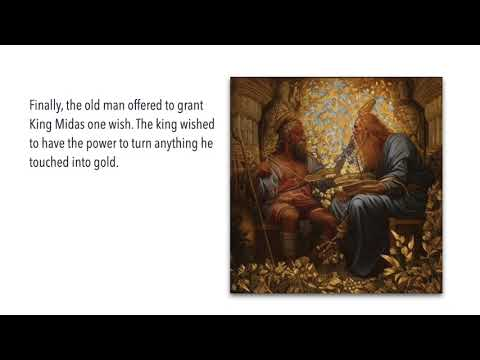

In [ ]:
# Display youtube video
YouTubeVideo("_lBbs0kpYRs", width=800, height=600)
#video가 주는 교훈 : 디지털리터러시 수준 차이가 크기 때문에, ai를 활용하여 불러일으킬 수 있는 결과를 예측할 수 있어야 한다. 인공지능과 관련된 규제의 필요성.

##[2] How to create

In [ ]:
#@markdown Define tts(), 'sample.mp3' (가려져 있었음-> 외울필요 x)
def tts(mytext):
    tts = gTTS(mytext)
    tts.save('sample.mp3')
    return Audio('sample.mp3', autoplay=True)
def ktts(mytext):
  tts = gTTS(mytext, lang="ko")
  tts.save('Ksample.mp3')
  return Audio('Ksample.mp3', autoplay=True)

In [ ]:
txt = "He was heartbroken, realizing the mistake he had made."
tts(txt)
Audio('sample.mp3')

In [ ]:
#가려져 있었음
Sentence_number = "1" #@param = [0, 1, 2,3,4,5,6,7,8,9,10,11]
para = int(Sentence_number)

plist = ["The story of king Midas and his hand. This video is powered by Chat GPT, Midjourney, and Keynote.",
         "Once upon a time, there was a king named Midas who loved treasure more than anything else in the world.",
         "He always wanted to have more and more gold and riches.",
         "One day, while exploring his kingdom, King Midas met an old man who had a special power. This old man was related to a god called Dionysus and could grant wishes to people.",
         "Excited by this magical opportunity, King Midas invited the old man to his palace. He treated him to delicious food and drinks, hoping to get a special wish from him.",
         "Finally, the old man offered to grant King Midas one wish. The king wished to have the power to turn anything he touched into gold.",
         "To his surprise, the old man granted his wish! King Midas was thrilled and started turning everything he touched into shiny gold. At first, he was very happy with his new power.",
         "But soon, King Midas realized that his wish had some problems.",
         "When he tried to eat his favorite food, it turned into hard gold and he couldn't enjoy it anymore. He became sad and lonely.",
         "One day, his daughter came to him, hoping to make him feel better.",
         "King Midas hugged her, but as soon as he touched her, she turned into a golden statue.",
         "He was heartbroken, realizing the mistake he had made.",
         "Here's a question for you. How does the story of King Midas connect to the risks and ethics of handling AI technology, without understanding its capabilities and consequences?"
         ]

mytext = plist[para]
tts(mytext)

#### Rename files
import os

old = "sample.mp3"
new = "sample"+str(para)+".mp3"

# rename the file
os.rename(old, new)
Audio(new)

:## Speech synthesis of the whole story

In [ ]:
mytxt = """
Once upon a time, there was a king named Midas who loved treasure more than anything else in the world. He always wanted to have more and more gold and riches.
One day, while exploring his kingdom, King Midas met an old man who had a special power. This old man was related to a god called Dionysus and could grant wishes to people.
Excited by this magical opportunity, King Midas invited the old man to his palace. He treated him to delicious food and drinks, hoping to get a special wish from him.
Finally, the old man offered to grant King Midas one wish. The king wished to have the power to turn anything he touched into gold.
To his surprise, the old man granted his wish! King Midas was thrilled and started turning everything he touched into shiny gold. At first, he was very happy with his new power.
But soon, King Midas realized that his wish had some problems. When he tried to eat his favorite food, it turned into hard gold and he couldn't enjoy it anymore. He became sad and lonely.
One day, his daughter came to him, hoping to make him feel better. King Midas hugged her, but as soon as he touched her, she turned into a golden statue. He was heartbroken, realizing the mistake he had made.
"""

tts(mytxt)
Audio('sample.mp3')

## Auto transcript

In [ ]:
audio_file = open("Ksample.mp3", "rb")
transcript = openai.Audio.transcribe("whisper-1", audio_file)
myscript = transcript['text']
print(myscript)

## Auto translation

In [ ]:
audio_file = open("Ksample.mp3", "rb")
translation = openai.Audio.translate("whisper-1", audio_file)
print("Original speech:", myscript)
print("Translation: ", translation['text'])

FileNotFoundError: ignored